# Importing libraries

In [ ]:
pip install neattext emoji

In [ ]:
pip install nltk

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# import spacy
import re
import nltk

# import string

import sklearn
import neattext as nt
import neattext.functions as nfx
import pandas as pd
import tensorflow as tf
nltk.download('stopwords')
nltk.download('wordnet')

from nltk.corpus import stopwords
from collections import Counter
from tensorflow.keras import layers
from tensorflow.keras.layers import Input, Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.optimizers import Adam

from sklearn.metrics import classification_report
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.initializers import TruncatedNormal
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.metrics import CategoricalAccuracy
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.sequence import pad_sequences
from nltk.tokenize import word_tokenize
import pickle

from transformers import AutoTokenizer, TFBertModel
tokenizer = AutoTokenizer.from_pretrained('bert-base-cased')
bert = TFBertModel.from_pretrained('bert-base-cased')
from sklearn.svm import LinearSVC
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report
# Libraries for general purpose
# Text cleaning
import string
import emoji
from nltk.stem import WordNetLemmatizer, PorterStemmer
# Data preprocessing
from sklearn import preprocessing
from imblearn.over_sampling import RandomOverSampler


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.we

In [ ]:
from google.colab import drive

drive_path = "/content/augmented_dataset.csv"
df = pd.read_csv(drive_path)

# Exploratory data analysis

In [ ]:
df.sample(10)

,tweet_text,cyberbullying_type
69155,@ C_Coolidge The Muslim community rich_person ...,religion
49964,@ Somalsarwar @ _Ibn_Latif ROFL . That 's Asso...,not_cyberbullying
93099,the manner the “ revolution ” hour_angle be wh...,ethnicity
45055,Chineke RT @AntiDARKSKINNED: Don't start with ...,ethnicity
70914,"Drew Brees ' wife , Bretagne , apologize : 'We...",religion
71396,If being angstrom Muslim make n't stop you fro...,religion
23318,Russia from Lenin and Muslims in Middle East h...,religion
77564,@ DiscordianKitty wat Oklahoma iodine rerun an...,other_cyberbullying
5701,http://t.co/mltOYmL,not_cyberbullying
14773,"And your ""gay son"" joke? Not homophobic, that'...",gender


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95384 entries, 0 to 95383
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_text          95384 non-null  object
 1   cyberbullying_type  95384 non-null  object
dtypes: object(2)
memory usage: 1.5+ MB


**Dataset columns and features**

In [ ]:
df.columns

Index(['tweet_text', 'cyberbullying_type'], dtype='object')

In [ ]:
df['cyberbullying_type'].unique()

array(['not_cyberbullying', 'gender', 'religion', 'other_cyberbullying',
       'age', 'ethnicity'], dtype=object)

**Remove duplicate tweets**

In [ ]:
df.duplicated().sum()

174

In [ ]:
df = df[~df.duplicated()]
df.duplicated().sum()

0

**Femove null tweets if any**

In [ ]:
df.isnull().sum()

tweet_text            0
cyberbullying_type    0
dtype: int64

# Data Visualisation

**Check if all classes are balanced**

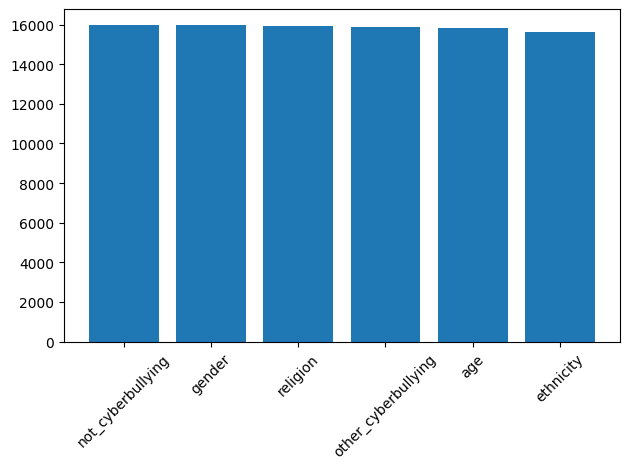

religion               15989
age                    15975
ethnicity              15907
gender                 15880
not_cyberbullying      15846
other_cyberbullying    15613
Name: cyberbullying_type, dtype: int64


In [ ]:
plt.bar(df['cyberbullying_type'].unique(), df['cyberbullying_type'].value_counts())
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
print(df['cyberbullying_type'].value_counts())

**Find out most common hate words**

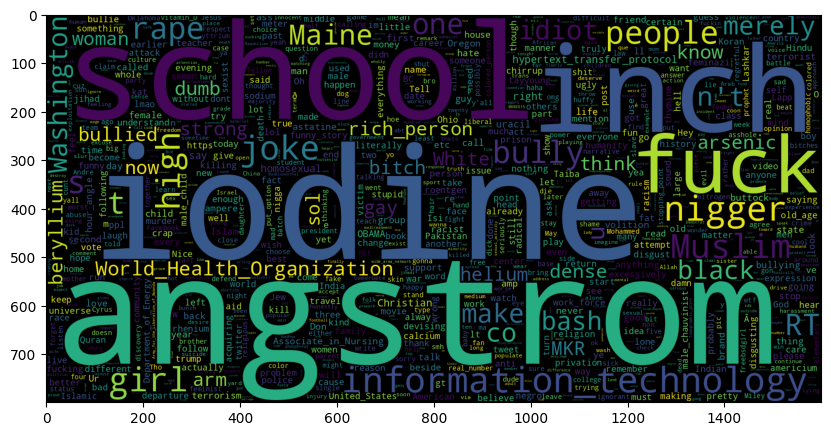

In [ ]:
from wordcloud import WordCloud
plt.figure(figsize= (10,10))
wc = WordCloud(max_words=1000, width= 1600, height= 800, collocations= False).generate(' '.join(df['tweet_text']))
plt.imshow(wc)

# Data Processing

**Use neattext and NLTK for filtering stopwords, hashtags, emoji,remove URL**

In [ ]:
df.sample(5)

,tweet_text,cyberbullying_type
22639,RT @dstfelix: to be clear white boys singing a...,religion
91686,omg Ur devising Maine soft you ’ rhenium liter...,ethnicity
2893,Mama dukes is the best,not_cyberbullying
7234,@keywordmkt is daily begging for likes somethi...,not_cyberbullying
71716,@ bkerensa you are not helping my anxiety .,other_cyberbullying


In [ ]:
df['tweet_text'] = df['tweet_text'].apply(nfx.remove_hashtags)
df['tweet_text'] = df['tweet_text'].apply(nfx.remove_userhandles)
df['tweet_text'] = df['tweet_text'].apply(nfx.remove_multiple_spaces)
df['tweet_text'] = df['tweet_text'].apply(nfx.remove_stopwords)
df['tweet_text'] = df['tweet_text'].apply(nfx.remove_urls)

In [ ]:
df['tweet_text'] = df['tweet_text'].apply(nfx.remove_html_tags)
df['tweet_text'] = df['tweet_text'].apply(nfx.remove_emojis)
df['tweet_text'] = df['tweet_text'].apply(nfx.fix_contractions)
df['tweet_text'] = df['tweet_text'].apply(nfx.remove_special_characters)
df['tweet_text'] = df['tweet_text'].apply(nfx.remove_puncts)

**Convert all letters to lowercase**

In [ ]:
df['tweet_text'] = df['tweet_text'].str.lower()

**Cleaned dataset**

In [ ]:
df.sample(5)

,tweet_text,cyberbullying_type
83470,taylor swift kind person iodine richperson st...,age
31581,this this million times this know fill dating...,other_cyberbullying
14101,happy send women rape threats death threats vi...,gender
23381,non muslim friends deen idiots,religion
13197,youve managed bitches females men men continue...,gender


# Label Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()

df['cyberbullying_type'] = labelencoder.fit_transform(df['cyberbullying_type'])

In [ ]:

# 0 - age
# 1 - ethnicity
# 2 - gender
# 3 - not_cyberbullying
# 4 - other_cyberbullying
# 5 - religion


In [ ]:
df.sample(5)

,tweet_text,cyberbullying_type
43203,yall im white ones hiding anything african ame...,1
72102,sschinke lone leo,4
94378,jerica iodine privation release worldhealthorg...,1
12810,rt cannot believe releasing female thor comic ...,2
39300,thing cops ppl bullied high school want power ...,0


# NON DL ALGORITHMS
* SVM
* Naive bayes
* Random Forests


**Train Test Split**

In [ ]:
seed_value = 300
X = df['tweet_text']
y = df['cyberbullying_type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=seed_value)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, stratify=y_train, random_state=seed_value)

In [ ]:
# Transforming the data using TF-IDF Vectorizer
vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features= 500000)
vectoriser.fit(X_train)
print("No. of feature words: ",len(vectoriser.get_feature_names_out()))

No. of feature words:  489677


In [ ]:
# transforming the data
X_train = vectoriser.transform(X_train)
X_test = vectoriser.transform(X_test)

In [ ]:
X_train

<60934x489677 sparse matrix of type '<class 'numpy.float64'>'
	with 1580330 stored elements in Compressed Sparse Row format>

In [ ]:
X_test

<19042x489677 sparse matrix of type '<class 'numpy.float64'>'
	with 380624 stored elements in Compressed Sparse Row format>

In [ ]:
y_train

12062    2
93463    1
18373    5
20524    5
44287    1
        ..
29563    4
85470    0
26688    4
1917     3
62090    2
Name: cyberbullying_type, Length: 60934, dtype: int64

In [ ]:
y_test

49043    3
88438    1
15404    2
70333    5
28238    4
        ..
57016    2
79660    0
27424    4
81808    0
35011    0
Name: cyberbullying_type, Length: 19042, dtype: int64

# Naive Bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train, y_train)

MultinomialNB()

In [ ]:
accuracy = nb.score(X_test, y_test)
print(accuracy)

0.7725028883520638


In [ ]:
from sklearn.metrics import classification_report
nb_pred = nb.predict(X_test)
print('Classification Report for Naive Bayes:\n',classification_report(y_test, nb_pred))

Classification Report for Naive Bayes:
               precision    recall  f1-score   support

           0       0.73      0.99      0.84      3195
           1       0.86      0.94      0.90      3181
           2       0.83      0.86      0.84      3176
           3       0.68      0.39      0.50      3169
           4       0.66      0.46      0.54      3123
           5       0.79      0.99      0.88      3198

    accuracy                           0.77     19042
   macro avg       0.76      0.77      0.75     19042
weighted avg       0.76      0.77      0.75     19042



In [ ]:
with open('naivebayes.pkl', 'wb') as file:
    pickle.dump(nb, file)

# SVM

In [ ]:
# Model
from sklearn.svm import SVC
svm_model_linear = SVC(kernel= 'linear', C = 1).fit(X_train, y_train)
svm_predictions  = svm_model_linear.predict(X_test)

In [ ]:
example = np.zeros(100)
example = ["Kat is an absolutely disgusting human being"]
example = vectoriser.transform(example)
example

<1x489677 sparse matrix of type '<class 'numpy.float64'>'
	with 11 stored elements in Compressed Sparse Row format>

In [ ]:
svm_model_linear.predict(example)

array([2])

In [ ]:
accuracy = svm_model_linear.score(X_test, y_test)
print(accuracy)

0.8517487658859364


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
y_pred = svm_model_linear.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97      3195
           1       0.97      0.99      0.98      3181
           2       0.91      0.88      0.90      3176
           3       0.66      0.60      0.62      3169
           4       0.65      0.69      0.67      3123
           5       0.96      0.97      0.97      3198

    accuracy                           0.85     19042
   macro avg       0.85      0.85      0.85     19042
weighted avg       0.85      0.85      0.85     19042



In [ ]:
with open('svm.pkl', 'wb') as file:
    pickle.dump(svm_model_linear, file)

**Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
rf_pred = rf.predict(X_test)
print('Classification Report for Random Forest:\n',classification_report(y_test, rf_pred))

Classification Report for Random Forest:
               precision    recall  f1-score   support

           0       0.97      0.98      0.98      3195
           1       0.98      0.98      0.98      3181
           2       0.92      0.82      0.87      3176
           3       0.61      0.55      0.58      3169
           4       0.57      0.69      0.62      3123
           5       0.97      0.96      0.97      3198

    accuracy                           0.83     19042
   macro avg       0.84      0.83      0.83     19042
weighted avg       0.84      0.83      0.83     19042



In [ ]:
y_test

49043    3
88438    1
15404    2
70333    5
28238    4
        ..
57016    2
79660    0
27424    4
81808    0
35011    0
Name: cyberbullying_type, Length: 19042, dtype: int64

In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,rf_pred))

0.8299548366768197


In [ ]:
with open('randomforests.pkl', 'wb') as file:
    pickle.dump(rf, file)

# DL ALGORITHMS
* BERT
* LSTM
* Bi-LSTM

# BERT-CNN Model

In [ ]:
from transformers import AutoTokenizer, TFBertModel
from transformers import BertTokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-cased')

**Test train split**

In [ ]:
X = df['tweet_text'].values
y = df['cyberbullying_type'].values
seed_value = 300
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=seed_value)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, stratify=y_train, random_state=seed_value)

In [ ]:
X_train

array(['gay community feel insulted gunns homophobic joke know ticket sale difference wankers pockets think i will suicide squad cinemas let us remember deleted 10k jokes rape pedophilia',
       ' misfitinchains  oldgfatherclock  venereveritas13 santaclaus   white',
       'wrong islam women rights imprisoned houses remember katjia wealthy islam',
       ...,
       'dude got it protector journalistic integrity number 15 bravely defend scott walker feminazi rhetoric',
       'point i would happy wrecking faces random bgs arenas months',
       '  rake murder apparel '], dtype=object)

In [ ]:
len(X)

95210

In [ ]:
len(y)

95210

**Tokenisation**

In [ ]:
x_train = tokenizer(
    text = X_train.tolist(),
    add_special_tokens = True,
    max_length = 100,
    truncation = True,
    padding = True,
    return_tensors = 'tf',
    return_token_type_ids = False,
    return_attention_mask = True,
    verbose = True
)

In [ ]:
x_train['input_ids']

<tf.Tensor: shape=(60934, 100), dtype=int32, numpy=
array([[  101,  6463,  1661, ...,     0,     0,     0],
       [  101,  1940,  1116, ...,     0,     0,     0],
       [  101,  2488,  1110, ...,     0,     0,     0],
       ...,
       [  101, 17869,  1400, ...,     0,     0,     0],
       [  101,  1553,   178, ...,     0,     0,     0],
       [  101,   187,  9899, ...,     0,     0,     0]], dtype=int32)>

In [ ]:
x_train['attention_mask']

<tf.Tensor: shape=(60934, 100), dtype=int32, numpy=
array([[1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0]], dtype=int32)>

In [ ]:
x_test = tokenizer(
    text = X_test.tolist(),
    add_special_tokens = True,
    max_length = 100,
    truncation = True,
    padding = True,
    return_tensors = 'tf',
    return_token_type_ids = False,
    return_attention_mask = True,
    verbose = True
)

In [ ]:
x_test['input_ids']

<tf.Tensor: shape=(19042, 100), dtype=int32, numpy=
array([[  101, 14596,  1777, ...,     0,     0,     0],
       [  101, 25338,  1233, ...,     0,     0,     0],
       [  101,  4665,  2555, ...,     0,     0,     0],
       ...,
       [  101,   187, 10008, ...,     0,     0,     0],
       [  101,   184,  1306, ...,     0,     0,     0],
       [  101,  1278, 12200, ...,     0,     0,     0]], dtype=int32)>

In [ ]:
x_test['attention_mask']

<tf.Tensor: shape=(19042, 100), dtype=int32, numpy=
array([[1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0]], dtype=int32)>

In [ ]:
len(x_train['input_ids'])

60934

In [ ]:
len(y_train)

60934

**CNN layers**

In [ ]:
max_len = 100


input_ids = Input(shape=(max_len,), dtype=tf.int32, name='input_ids')
input_mask = Input(shape=(max_len,), dtype=tf.int32, name='attention_mask')

# 0 is the last hidden state, 1 means pooler_output
# We need only the hidden state, so that we can add more layers and fine-tune the model.
# We'll use functional API

embeddings = bert(input_ids, attention_mask=input_mask)[0]
out = tf.keras.layers.GlobalMaxPool1D()(embeddings)
out = Dense(128, activation='relu')(out)
out = tf.keras.layers.Dropout(0.1)(out)
out = Dense(32, activation='relu')(out)

op = Dense(6, activation='sigmoid')(out)

model = tf.keras.Model(inputs=[input_ids, input_mask], outputs=op)
model.layers[2].trainable = True

TypeError: Exception encountered when calling layer 'embeddings' (type TFBertEmbeddings).

Could not build a TypeSpec for name: "tf.debugging.assert_less/assert_less/Assert/Assert"
op: "Assert"
input: "tf.debugging.assert_less/assert_less/All"
input: "tf.debugging.assert_less/assert_less/Assert/Assert/data_0"
input: "tf.debugging.assert_less/assert_less/Assert/Assert/data_1"
input: "tf.debugging.assert_less/assert_less/Assert/Assert/data_2"
input: "Placeholder"
input: "tf.debugging.assert_less/assert_less/Assert/Assert/data_4"
input: "tf.debugging.assert_less/assert_less/y"
attr {
  key: "T"
  value {
    list {
      type: DT_STRING
      type: DT_STRING
      type: DT_STRING
      type: DT_INT32
      type: DT_STRING
      type: DT_INT32
    }
  }
}
attr {
  key: "summarize"
  value {
    i: 3
  }
}
 of unsupported type <class 'tensorflow.python.framework.ops.Operation'>.

Call arguments received by layer 'embeddings' (type TFBertEmbeddings):
  • input_ids=<KerasTensor: shape=(None, 100) dtype=int32 (created by layer 'input_ids')>
  • position_ids=None
  • token_type_ids=<KerasTensor: shape=(None, 100) dtype=int32 (created by layer 'tf.fill')>
  • inputs_embeds=None
  • past_key_values_length=0
  • training=False

In [ ]:
# Bert model requires a specific learning rate as stated in the huggingface website
from tensorflow.keras.optimizers.legacy import Adam
optimizer = Adam(
    learning_rate=5e-05,
    epsilon=1e-08,
    decay=0.01,
    clipnorm=1.0
)

loss = CategoricalCrossentropy(from_logits=True)
metric = CategoricalAccuracy('balanced_accuracy')

model.compile(
    optimizer=optimizer,
    loss=loss,
    metrics=metric)

model.summary()

In [ ]:
bert_train = model.fit(

    x={'input_ids':x_train['input_ids'], 'attention_mask':x_train['attention_mask']},
    y=to_categorical(y_train),
    validation_data=(
        {'input_ids':x_test['input_ids'], 'attention_mask':x_test['attention_mask']},to_categorical(y_train)
    ),
    epochs=1,
    batch_size=32
)

In [ ]:
pred_raw = model.predict({'input_ids':x_test['input_ids'], 'attention_mask':x_test['attention_mask']})

# LSTM

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df['tweet_text'],df['cyberbullying_type'], test_size=0.2, random_state=42)

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.layers import Dropout
from keras.regularizers import l1, l2
lstmtokenizer = Tokenizer()
lstmtokenizer.fit_on_texts(df['tweet_text'])

In [ ]:
X_train_sequences = lstmtokenizer.texts_to_sequences(X_train)
X_test_sequences  = lstmtokenizer.texts_to_sequences(X_test)

In [ ]:
max_length     = 30
X_train_padded = pad_sequences(X_train_sequences, maxlen=max_length, padding='post')
X_test_padded  = pad_sequences(X_test_sequences , maxlen=max_length, padding='post')

In [ ]:
# Build the LSTM model
embedding_dim = 100
num_classes   = 6

model2 = Sequential([
    Embedding(input_dim=len(lstmtokenizer.word_index) + 1, output_dim=embedding_dim, input_length=max_length),
    LSTM(units=100),
    Dense(units=num_classes, activation='softmax')
])

model2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Train the model
lstm_history = model2.fit(X_train_padded, y_train, epochs=25, batch_size=32, validation_data=(X_test_padded, y_test))

Epoch 1/25
2385/2385 [==============================] - 389s 160ms/step - loss: 0.5638 - accuracy: 0.7585 - val_loss: 0.4180 - val_accuracy: 0.8265
Epoch 2/25
2385/2385 [==============================] - 357s 150ms/step - loss: 0.3216 - accuracy: 0.8754 - val_loss: 0.3670 - val_accuracy: 0.8568
Epoch 3/25
2385/2385 [==============================] - 355s 149ms/step - loss: 0.2280 - accuracy: 0.9117 - val_loss: 0.3845 - val_accuracy: 0.8590
Epoch 4/25
2385/2385 [==============================] - 361s 151ms/step - loss: 0.1711 - accuracy: 0.9289 - val_loss: 0.4444 - val_accuracy: 0.8539
Epoch 5/25
2385/2385 [==============================] - 356s 149ms/step - loss: 0.1383 - accuracy: 0.9381 - val_loss: 0.4820 - val_accuracy: 0.8500
Epoch 6/25
2385/2385 [==============================] - 352s 148ms/step - loss: 0.1164 - accuracy: 0.9443 - val_loss: 0.5338 - val_accuracy: 0.8482
Epoch 7/25
2385/2385 [==============================] - 368s 154ms/step - loss: 0.1032 - accuracy: 0.9469 - val_

In [ ]:
y_pred_probs = model2.predict(X_test_padded)
y_pred = np.argmax(y_pred_probs, axis=1)

print(classification_report(y_test, y_pred))

597/597 [==============================] - 9s 14ms/step
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      3301
           1       0.98      0.97      0.97      3158
           2       0.89      0.86      0.87      3155
           3       0.57      0.62      0.60      3156
           4       0.60      0.55      0.57      3082
           5       0.96      0.95      0.96      3225

    accuracy                           0.83     19077
   macro avg       0.82      0.82      0.82     19077
weighted avg       0.83      0.83      0.83     19077



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score
print(accuracy_score(y_test,y_pred))

0.8250248990931488


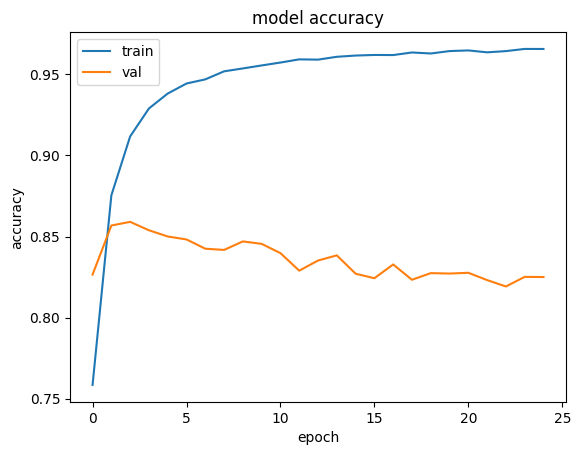

In [ ]:
plt.plot(lstm_history.history['accuracy'])
plt.plot(lstm_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# Bi-LSTM

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df['tweet_text'],df['cyberbullying_type'], test_size=0.2, random_state=42)

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.layers import Dropout
from keras.regularizers import l1, l2
lstmtokenizer = Tokenizer()
lstmtokenizer.fit_on_texts(df['tweet_text'])

In [ ]:
X_train_sequences = lstmtokenizer.texts_to_sequences(X_train)
X_test_sequences  = lstmtokenizer.texts_to_sequences(X_test)

In [ ]:
max_length     = 30
X_train_padded = pad_sequences(X_train_sequences, maxlen=max_length, padding='post')
X_test_padded  = pad_sequences(X_test_sequences , maxlen=max_length, padding='post')

In [ ]:
from keras.layers import Dense, Dropout, Embedding, LSTM, Bidirectional
# Build the LSTM model
embedding_dim = 100
num_classes   = 6

model3 = Sequential([
    Embedding(input_dim=len(lstmtokenizer.word_index) + 1, output_dim=embedding_dim, input_length=max_length),
    Bidirectional(LSTM(units=100)),
    Dense(units=num_classes, activation='softmax')
])

model3.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Train the model
bilstm_history = model3.fit(X_train_padded, y_train, epochs=25, batch_size=32, validation_data=(X_test_padded, y_test))

Epoch 1/25
2385/2385 [==============================] - 488s 203ms/step - loss: 0.4807 - accuracy: 0.7959 - val_loss: 0.3708 - val_accuracy: 0.8552
Epoch 2/25
2385/2385 [==============================] - 456s 191ms/step - loss: 0.2684 - accuracy: 0.8931 - val_loss: 0.3558 - val_accuracy: 0.8560
Epoch 3/25
2385/2385 [==============================] - 466s 195ms/step - loss: 0.1895 - accuracy: 0.9220 - val_loss: 0.3896 - val_accuracy: 0.8525
Epoch 4/25
2385/2385 [==============================] - 458s 192ms/step - loss: 0.1473 - accuracy: 0.9343 - val_loss: 0.4095 - val_accuracy: 0.8571
Epoch 5/25
2385/2385 [==============================] - 464s 195ms/step - loss: 0.1197 - accuracy: 0.9434 - val_loss: 0.5093 - val_accuracy: 0.8526
Epoch 6/25
2385/2385 [==============================] - 483s 203ms/step - loss: 0.1042 - accuracy: 0.9478 - val_loss: 0.5499 - val_accuracy: 0.8542
Epoch 7/25
2385/2385 [==============================] - 485s 204ms/step - loss: 0.0919 - accuracy: 0.9509 - val_

In [ ]:
y_pred_probs = model3.predict(X_test_padded)
y_pred = np.argmax(y_pred_probs, axis=1)

print(classification_report(y_test, y_pred))

597/597 [==============================] - 12s 18ms/step
              precision    recall  f1-score   support

           0       0.98      0.97      0.98      3301
           1       0.98      0.97      0.98      3158
           2       0.90      0.86      0.88      3155
           3       0.61      0.59      0.60      3156
           4       0.60      0.66      0.63      3082
           5       0.96      0.96      0.96      3225

    accuracy                           0.84     19077
   macro avg       0.84      0.84      0.84     19077
weighted avg       0.84      0.84      0.84     19077



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score
print(accuracy_score(y_test,y_pred))

0.8380248466740053


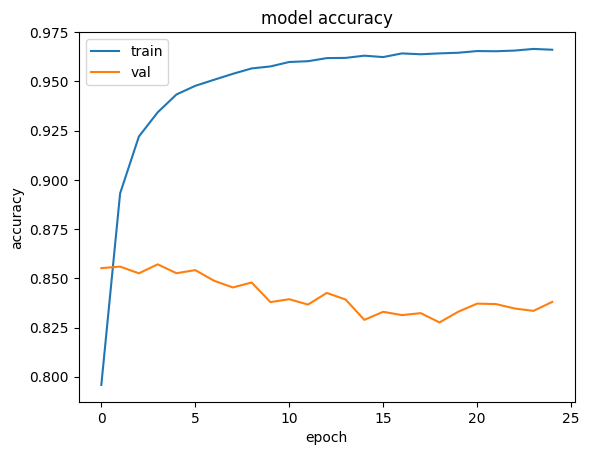

In [ ]:
plt.plot(bilstm_history.history['accuracy'])
plt.plot(bilstm_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()